http://www-star.st-and.ac.uk/~kw25/research/montecarlo/book.pdf

http://www-star.st-and.ac.uk/~kw25/research/montecarlo/slab/slab.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
Params={"nphotons" : 1000000,
        "mubins" : 10,
        "nlevels" : 10,
        "taumax" : 10.,
        "albedo" : 0.8}

In [83]:
class path:
    
    def __init__(self,params):
        ran = np.random.rand(2)
        
        costheta = np.sqrt(ran[0])
        sintheta = np.sqrt(1. - costheta*costheta)
        
        phi = 2.0*np.pi*ran[1]
        cosphi = np.cos(phi)
        sinphi = np.sin(phi)
        
        self.angles = {"cosphi" : cosphi, 
                       "sinphi" : sinphi, 
                       "costheta" : costheta, 
                       "sintheta" : sintheta}
        
        self.tau = self.optical_depth(params)
        
        self.pos = {"x" : self.tau*cosphi*sintheta,
                    "y" : self.tau*sinphi*sintheta, 
                    "z" : self.tau*costheta}
        
        self.level_1 = 0.0
        self.level_2 = self.convert_z_to_level(self.pos["z"],params)
        
        self.absorbed = False
        
        self.energy = np.zeros(params["mubins"])
        self.erri = np.zeros(params["mubins"])
    
    def convert_z_to_level(self,z,params):
        l = int(z*float(params["nlevels"]))
        return 1
    
    def optical_depth(self,params):
        t = -np.log(np.random.rand())
        t /= params["taumax"]
        return t
    
    def distance(self):
        return np.sqrt(self.pos["x"]**2+self.pos["y"]**2+self.pos["z"]**2)
    
    def update(self,params):
        ran = np.random.rand(2)
        
        costheta = 2.0*ran[0] - 1.0
        sintheta = np.sqrt(1. - costheta*costheta)
        
        phi = 2.0*np.pi*ran[1]
        cosphi = np.cos(phi)
        sinphi = np.sin(phi)
        
        self.tau = self.optical_depth(params)
        
        self.pos["x"] += self.tau*cosphi*sintheta
        self.pos["y"] += self.tau*sinphi*sintheta
        self.pos["z"] += self.tau*costheta
        
        self.level_1 = self.level_2
        self.level_2 = self.convert_z_to_level(self.pos["z"],params)
        
    def absorption(self,params):
        test = True
        if(np.random.rand() < params["albedo"]):
            test = False
        else:
            self.absorbed = True
        return test
        
    def evolve(self,params):
        while (self.pos["z"] >= 0.0) and (self.pos["z"] <= 1.0):
            self.update(params)
            if (self.pos["z"] < 0.0) or (self.pos["z"] > 1.0) or self.absorption(params):
                break
            self.compute_energy(params)
            
    def compute_energy(self,params):
        l=int(params["mubins"]*self.angles["costheta"])
        self.erri[l] += 1
        self.energy[l] += 1

In [84]:
def photon(params):
    p = path(params)
    p.evolve(params)
    return p.energy

In [85]:
s = Params

energy = np.zeros(s["mubins"])
for i in range(s["nphotons"]):
    energy += photon(s)

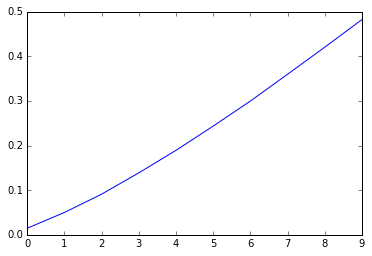

In [86]:
plt.plot(energy/float(Params["nphotons"]))